<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


*   Extract information from a given web site
*   Write the scraped data into a csv file.


## Extract information from the given web site

You will extract the data from the below web site: <br>


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
from bs4 import BeautifulSoup
import requests
import html5lib
import pandas as pd
from openpyxl import Workbook

Download the webpage at the url


In [3]:
data  = requests.get(url).text 

Create a soup object


In [4]:
soup = BeautifulSoup(data,"html5lib")

Scrape the `Language name` and `annual average salary`.


In [5]:
wb = Workbook()
ws = wb.active

for row in soup.find_all('tr'):
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    language = cols[1].getText() # store the value in column 3 as color_name
    salary = cols[3].getText() # store the value in column 4 as color_code
    ws.append([language, salary])


Save the scrapped data into a file named *popular-languages.csv*


In [22]:
wb.save("popular-languages.xlsx")
df = pd.read_excel("popular-languages.xlsx")
df.to_csv('popular-languages.csv')

df['Average Annual Salary'] = df['Average Annual Salary'].fillna(0.0).str.replace('[$,]', '').astype('float')

/tmp/wsuser/ipykernel_750/63161910.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Average Annual Salary'] = df['Average Annual Salary'].fillna(0.0).str.replace('[$,]', '').astype('float')


<AxesSubplot:title={'center':'Annual Salary based on Languages'}, xlabel='Language'>

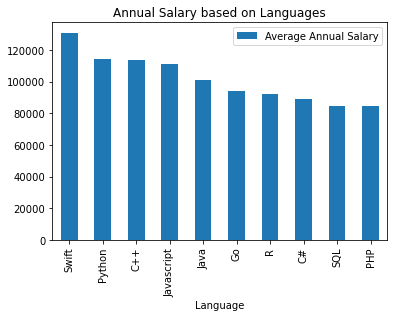

In [25]:
df_sort = df.sort_values(by=['Average Annual Salary'], ascending=False)
df_sort.plot(kind='bar', x='Language', title='Annual Salary based on Languages')

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01).
